# Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [3]:
df = pd.read_csv('heart (1).csv')

# Data Inspection

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Checking missing values

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Checking Outliers

In [9]:
df.shape

(303, 14)

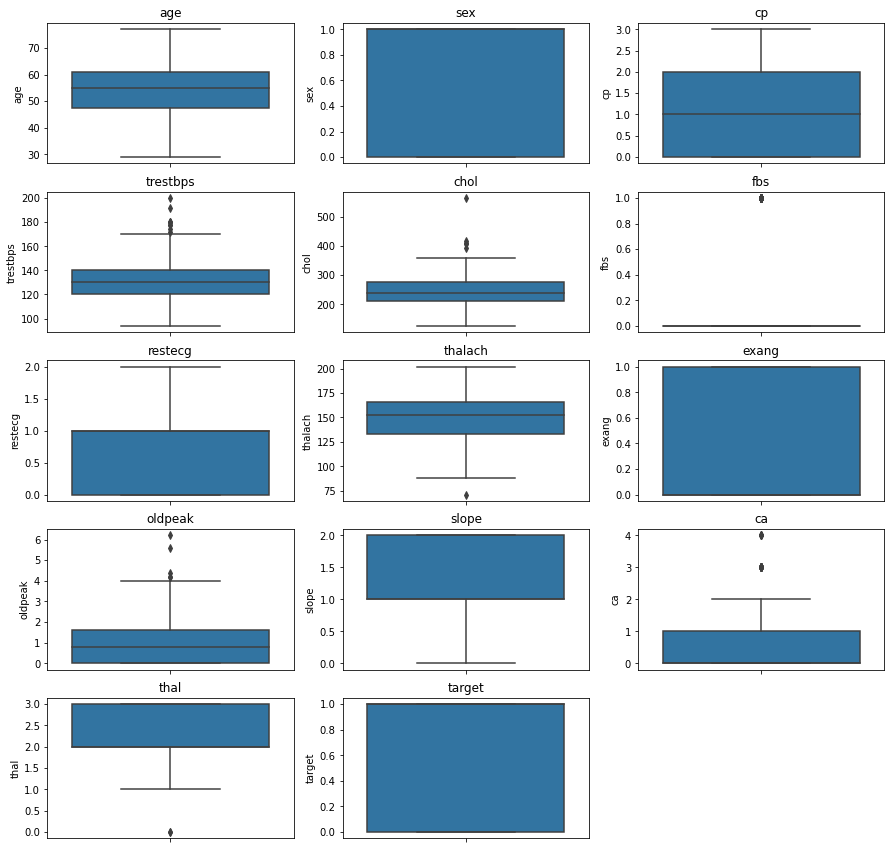

In [34]:
i = 1
plt.figure(figsize=(15,15))
for x in df.columns:
    if i == 15:
        break
    else:
        plt.subplot(5,3,i)
        sns.boxplot(y=df[x])
        plt.title(x)
        #plt.show()
    i+=1

No Outliers, data points are in clusters, some higher data points are acceptable as it is true reading.

# Visualization

In [149]:
data = df.copy()

In [151]:
data.target=data.target.map({0:'Absence',1:'Presence'})

<AxesSubplot:xlabel='target', ylabel='count'>

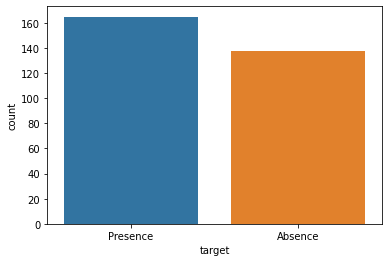

In [152]:
sns.countplot(data.target)

Disease present records are more than absent in this dataset

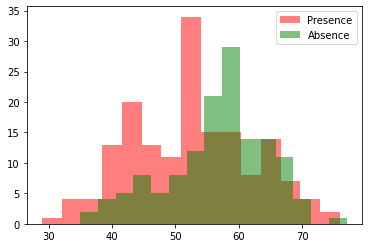

In [158]:
plt.hist(data[data.target=='Presence']['age'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['age'],color='g',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

Looks like age range 40 to 60 have lot of risk of having disease

In [160]:
data.sex=data.sex.map({0:'Female',1:'Male'})

<AxesSubplot:xlabel='sex', ylabel='count'>

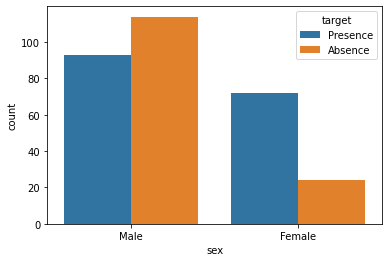

In [161]:
sns.countplot(data.sex,hue=data.target)

Comparing to Males, it seems more Females are having disease

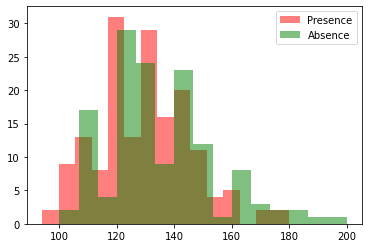

In [163]:
plt.hist(data[data.target=='Presence']['trestbps'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['trestbps'],color='g',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

Resting Blood pressure looks similar for both disease presence and absence

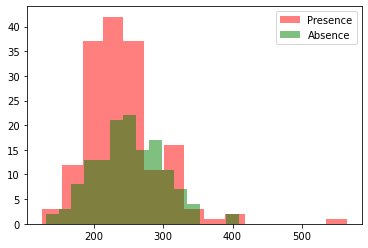

In [165]:
plt.hist(data[data.target=='Presence']['chol'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['chol'],color='g',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

Serum Cholestoral level between 200 to 380 mg/dl have high risk of disease

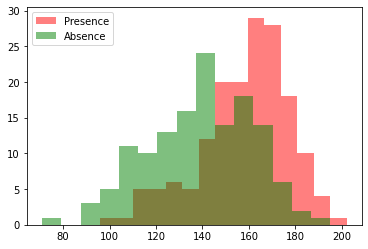

In [169]:
plt.hist(data[data.target=='Presence']['thalach'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['thalach'],color='g',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

Maximun Heart Rate range between 150 to 180 have high risk of having the disease

<AxesSubplot:xlabel='ca', ylabel='count'>

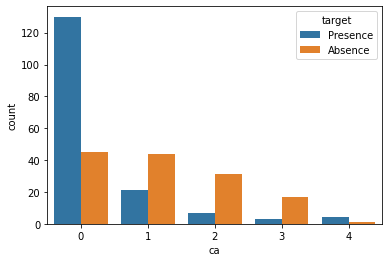

In [174]:
sns.countplot(data.ca,hue=data.target)

Less number of major vessels colored by flourosopy have risk of having the disease

# Create X and Y

In [86]:
X = df.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [88]:
Y = df.target

# Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

In [94]:
X = pd.DataFrame(X,columns=df.columns[:-1])

# Model Building and Prediction using SVM

In [209]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [210]:
from sklearn import svm
svc_model=svm.SVC(kernel="rbf",C=1.0,gamma=.1)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)


In [211]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
c = classification_report(Y_test,Y_pred)
print(c)
a = accuracy_score(Y_test,Y_pred)
print(a)

[[26  9]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61

0.7704918032786885


In [212]:
from sklearn.ensemble import AdaBoostClassifier
lr = AdaBoostClassifier()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [213]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
c = classification_report(Y_test,Y_pred)
print(c)
a = accuracy_score(Y_test,Y_pred)
print(a)

[[30  5]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.81      0.81      0.81        26

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

0.8360655737704918
